# Train a Variational Autoencoder for generating cat images

In [1]:
import numpy as np
from glob import glob
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from src.model import genModel
from src.vaeHelpers import *

%matplotlib inline

Using TensorFlow backend.


## Load the data

Load the data, create a training/validation split. Save the split to a file to help with continuation of training.

In [2]:
trainFresh = True

if ( trainFresh ):
    catFiles = np.array( glob('./catCropedBetter/*.jpg') )
    
    valFrac = 0.1
    n = len(catFiles)
    
    inds = np.random.permutation( len(catFiles) )
    trainInds, valInds = inds[ : -int(n*valFrac) ], inds[ -int(n*valFrac) : ]
    
    train, val = catFiles[ trainInds ], catFiles[ valInds ]
    
    writeFilesList( "trainCats.txt", train )
    writeFilesList( "valCats.txt", val )

else:
    val   = readSavedFiles( "valFiles.txt" )
    train = readSavedFiles( "trainFiles.txt" )

## Generate the model 

In [3]:
batchSize = 64
imgSize = 128

encoder, decoder, VAE = genModel( imgSize = 128, batchSize = 64 )
VAE.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
encoder (Model)              [(None, 2048), (None, 204 16814456  
_________________________________________________________________
decoder (Model)              (None, 128, 128, 3)       12632155  
Total params: 29,446,611
Trainable params: 29,429,875
Non-trainable params: 16,736
_________________________________________________________________


/home/baxter/Desktop/MLbook/catGenerator/src/model.py:108: UserWarning: Output "decoder" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "decoder" during training.
  VAE.compile( optimizer = opt, loss = None )


## Train the model

In [4]:
if ( not trainFresh ):
    VAE.load_weights( "weights/catGen.hdf5" )

earlyStopper = EarlyStopping( patience = 50, verbose = 1 )
checkPointer = ModelCheckpoint( filepath = "weights/catGen.hdf5", save_best_only = True, verbose = 1 )
rateReduce   = ReduceLROnPlateau( monitor = 'val_loss', factor = 0.5, patience = 20, cooldown = 5 )

losses = VAE.fit_generator( genBatch( train, batchSize, imgSize, True ),
                   validation_data = genBatch( val, batchSize, imgSize, False ),
                   epochs = 5000,
                   validation_steps = len(val)   // batchSize,
                   steps_per_epoch  = len(train) // batchSize,
                   callbacks = [ earlyStopper, checkPointer ] )
                   #callbacks = [ earlyStopper, checkPointer, rateReduce ] )

Epoch 1/5000
139/140 [============================>.] - ETA: 0s - loss: 989.3578
Epoch 00001: val_loss improved from inf to 704.65448, saving model to weights/catGen.hdf5
140/140 [==============================] - 21s 150ms/step - loss: 986.9976 - val_loss: 704.6545
Epoch 2/5000
139/140 [============================>.] - ETA: 0s - loss: 841.7833
Epoch 00002: val_loss improved from 704.65448 to 605.33523, saving model to weights/catGen.hdf5
140/140 [==============================] - 19s 137ms/step - loss: 840.2312 - val_loss: 605.3352
Epoch 3/5000
139/140 [============================>.] - ETA: 0s - loss: 736.7863
Epoch 00003: val_loss improved from 605.33523 to 587.63274, saving model to weights/catGen.hdf5
140/140 [==============================] - 19s 135ms/step - loss: 735.2847 - val_loss: 587.6327
Epoch 4/5000
139/140 [============================>.] - ETA: 0s - loss: 800.7971
Epoch 00004: val_loss did not improve
140/140 [==============================] - 19s 132ms/step - loss: 79

Epoch 36/5000
139/140 [============================>.] - ETA: 0s - loss: 474.6304
Epoch 00036: val_loss did not improve
140/140 [==============================] - 19s 134ms/step - loss: 474.0749 - val_loss: 439.9855
Epoch 37/5000
139/140 [============================>.] - ETA: 0s - loss: 453.7170
Epoch 00037: val_loss did not improve
140/140 [==============================] - 18s 130ms/step - loss: 453.4391 - val_loss: 469.3023
Epoch 38/5000
139/140 [============================>.] - ETA: 0s - loss: 440.6305
Epoch 00038: val_loss improved from 433.54324 to 421.08446, saving model to weights/catGen.hdf5
140/140 [==============================] - 20s 141ms/step - loss: 442.1664 - val_loss: 421.0845
Epoch 39/5000
139/140 [============================>.] - ETA: 0s - loss: 452.3002
Epoch 00039: val_loss did not improve
140/140 [==============================] - 19s 135ms/step - loss: 451.9161 - val_loss: 455.6615
Epoch 40/5000
139/140 [============================>.] - ETA: 0s - loss: 444.0

Epoch 73/5000
139/140 [============================>.] - ETA: 0s - loss: 407.5228
Epoch 00073: val_loss did not improve
140/140 [==============================] - 18s 132ms/step - loss: 407.4603 - val_loss: 399.2433
Epoch 74/5000
139/140 [============================>.] - ETA: 0s - loss: 402.0510
Epoch 00074: val_loss did not improve
140/140 [==============================] - 18s 132ms/step - loss: 402.1521 - val_loss: 417.9855
Epoch 75/5000
139/140 [============================>.] - ETA: 0s - loss: 409.1476
Epoch 00075: val_loss did not improve
140/140 [==============================] - 19s 137ms/step - loss: 409.0699 - val_loss: 398.2078
Epoch 76/5000
139/140 [============================>.] - ETA: 0s - loss: 395.4126
Epoch 00076: val_loss did not improve
140/140 [==============================] - 19s 133ms/step - loss: 395.1011 - val_loss: 403.6216
Epoch 77/5000
139/140 [============================>.] - ETA: 0s - loss: 400.2933
Epoch 00077: val_loss did not improve
140/140 [=======

Epoch 110/5000
139/140 [============================>.] - ETA: 0s - loss: 379.2730
Epoch 00110: val_loss did not improve
140/140 [==============================] - 18s 130ms/step - loss: 379.3685 - val_loss: 401.2045
Epoch 111/5000
139/140 [============================>.] - ETA: 0s - loss: 385.4555
Epoch 00111: val_loss did not improve
140/140 [==============================] - 19s 134ms/step - loss: 385.1745 - val_loss: 377.0467
Epoch 112/5000
139/140 [============================>.] - ETA: 0s - loss: 383.3015
Epoch 00112: val_loss did not improve
140/140 [==============================] - 19s 135ms/step - loss: 383.2024 - val_loss: 367.8494
Epoch 113/5000
139/140 [============================>.] - ETA: 0s - loss: 390.6313
Epoch 00113: val_loss did not improve
140/140 [==============================] - 18s 130ms/step - loss: 390.5158 - val_loss: 399.7653
Epoch 114/5000
139/140 [============================>.] - ETA: 0s - loss: 381.7660
Epoch 00114: val_loss did not improve
140/140 [==

139/140 [============================>.] - ETA: 0s - loss: 371.4109
Epoch 00147: val_loss did not improve
140/140 [==============================] - 19s 136ms/step - loss: 371.2476 - val_loss: 394.5839
Epoch 148/5000
139/140 [============================>.] - ETA: 0s - loss: 385.8484
Epoch 00148: val_loss did not improve
140/140 [==============================] - 20s 140ms/step - loss: 385.8740 - val_loss: 377.0672
Epoch 149/5000
139/140 [============================>.] - ETA: 0s - loss: 377.3318
Epoch 00149: val_loss did not improve
140/140 [==============================] - 19s 138ms/step - loss: 377.1273 - val_loss: 385.6818
Epoch 150/5000
139/140 [============================>.] - ETA: 0s - loss: 371.5423
Epoch 00150: val_loss did not improve
140/140 [==============================] - 19s 136ms/step - loss: 371.9471 - val_loss: 366.8253
Epoch 151/5000
139/140 [============================>.] - ETA: 0s - loss: 361.0493
Epoch 00151: val_loss did not improve
140/140 [=================

139/140 [============================>.] - ETA: 0s - loss: 365.4852
Epoch 00184: val_loss did not improve
140/140 [==============================] - 19s 135ms/step - loss: 365.3817 - val_loss: 359.2475
Epoch 185/5000
139/140 [============================>.] - ETA: 0s - loss: 365.4132
Epoch 00185: val_loss did not improve
140/140 [==============================] - 19s 133ms/step - loss: 365.4480 - val_loss: 393.0171
Epoch 186/5000
139/140 [============================>.] - ETA: 0s - loss: 354.4474
Epoch 00186: val_loss did not improve
140/140 [==============================] - 19s 135ms/step - loss: 354.2580 - val_loss: 366.9758
Epoch 187/5000
139/140 [============================>.] - ETA: 0s - loss: 356.2053
Epoch 00187: val_loss did not improve
140/140 [==============================] - 19s 136ms/step - loss: 356.2607 - val_loss: 353.8469
Epoch 188/5000
139/140 [============================>.] - ETA: 0s - loss: 362.3843
Epoch 00188: val_loss did not improve
140/140 [=================

139/140 [============================>.] - ETA: 0s - loss: 355.1709
Epoch 00221: val_loss did not improve
140/140 [==============================] - 19s 136ms/step - loss: 355.1777 - val_loss: 347.9010
Epoch 222/5000
139/140 [============================>.] - ETA: 0s - loss: 346.4231
Epoch 00222: val_loss did not improve
140/140 [==============================] - 18s 130ms/step - loss: 346.5588 - val_loss: 401.9263
Epoch 223/5000
139/140 [============================>.] - ETA: 0s - loss: 350.3365
Epoch 00223: val_loss did not improve
140/140 [==============================] - 19s 134ms/step - loss: 350.2615 - val_loss: 367.7331
Epoch 224/5000
139/140 [============================>.] - ETA: 0s - loss: 353.2034
Epoch 00224: val_loss did not improve
140/140 [==============================] - 18s 132ms/step - loss: 353.0426 - val_loss: 355.9697
Epoch 225/5000
139/140 [============================>.] - ETA: 0s - loss: 346.4672
Epoch 00225: val_loss did not improve
140/140 [=================

Epoch 259/5000
139/140 [============================>.] - ETA: 0s - loss: 351.3710
Epoch 00259: val_loss did not improve
140/140 [==============================] - 19s 135ms/step - loss: 351.4289 - val_loss: 354.6904
Epoch 260/5000
139/140 [============================>.] - ETA: 0s - loss: 353.7424
Epoch 00260: val_loss did not improve
140/140 [==============================] - 19s 133ms/step - loss: 353.6596 - val_loss: 357.0987
Epoch 261/5000
139/140 [============================>.] - ETA: 0s - loss: 351.8661
Epoch 00261: val_loss did not improve
140/140 [==============================] - 19s 137ms/step - loss: 352.1642 - val_loss: 357.0592
Epoch 262/5000
139/140 [============================>.] - ETA: 0s - loss: 349.3004
Epoch 00262: val_loss did not improve
140/140 [==============================] - 18s 131ms/step - loss: 349.0356 - val_loss: 357.0489
Epoch 263/5000
139/140 [============================>.] - ETA: 0s - loss: 348.3427
Epoch 00263: val_loss did not improve
140/140 [==

Epoch 297/5000
139/140 [============================>.] - ETA: 0s - loss: 335.3497
Epoch 00297: val_loss did not improve
140/140 [==============================] - 18s 132ms/step - loss: 335.3056 - val_loss: 344.4516
Epoch 298/5000
139/140 [============================>.] - ETA: 0s - loss: 348.1199
Epoch 00298: val_loss did not improve
140/140 [==============================] - 19s 139ms/step - loss: 348.0565 - val_loss: 357.2624
Epoch 299/5000
139/140 [============================>.] - ETA: 0s - loss: 344.1609
Epoch 00299: val_loss did not improve
140/140 [==============================] - 19s 132ms/step - loss: 344.0363 - val_loss: 348.5027
Epoch 300/5000
139/140 [============================>.] - ETA: 0s - loss: 338.1968
Epoch 00300: val_loss did not improve
140/140 [==============================] - 19s 136ms/step - loss: 338.0196 - val_loss: 354.5647
Epoch 301/5000
139/140 [============================>.] - ETA: 0s - loss: 340.3644
Epoch 00301: val_loss did not improve
140/140 [==

## Plot a learning curve

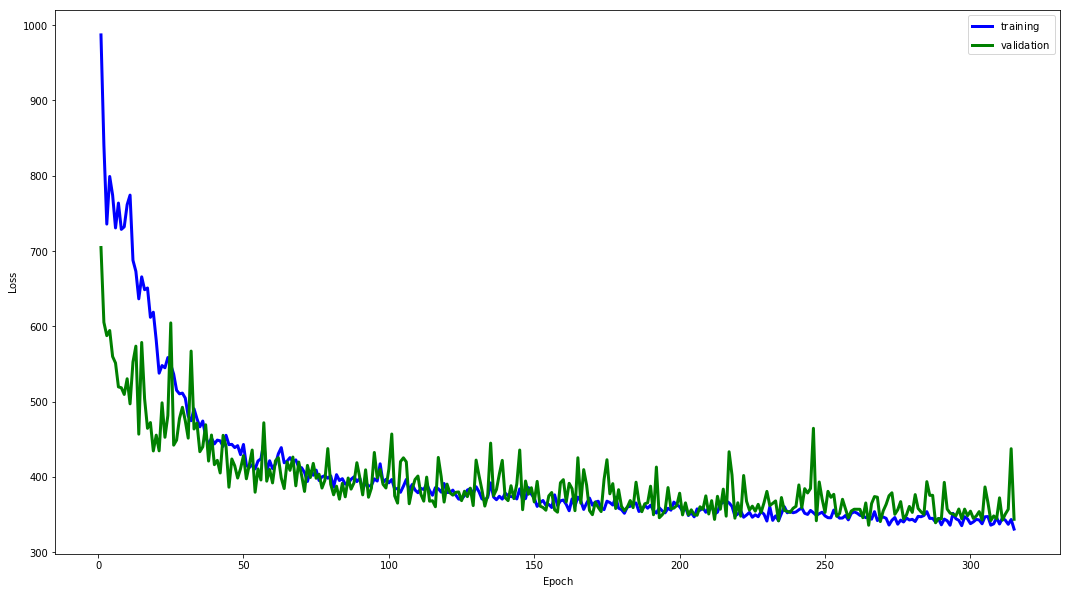

In [5]:
plotLosses( losses.history )